# Lecture 3 - Probability Distributions

## Objectives
+ Learn about some famous discrete PDFs
+ Learn about some famous continous PDFs

## The Gaussian Distribution

\begin{equation}
p(x|\mu,\sigma) = \mathcal{N}(x|\mu, \sigma)
\end{equation}

In [8]:
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

X = st.norm(loc=0.5, scale=2.)

In [3]:
print X.rvs(10)

[ 1.304981    1.22788537  1.04666977  0.48267009  0.75643823  1.19436586
  0.29618514 -1.48243962 -1.96499156 -1.19991452]


(array([   2.,    8.,   29.,  103.,  215.,  294.,  217.,   82.,   41.,    9.]),
 array([-7.42999951, -5.98315142, -4.53630333, -3.08945524, -1.64260714,
        -0.19575905,  1.25108904,  2.69793713,  4.14478523,  5.59163332,
         7.03848141]),
 <a list of 10 Patch objects>)

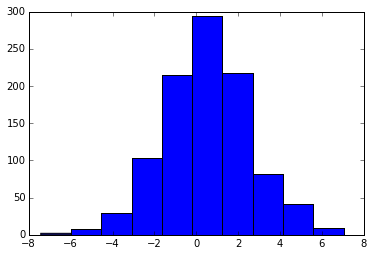

In [6]:
plt.hist(X.rvs(1000))

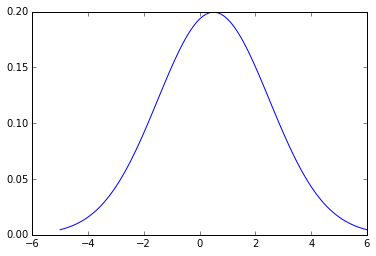

In [10]:
x = np.linspace(-5, 6, 100)
plt.plot(x, X.pdf(x))

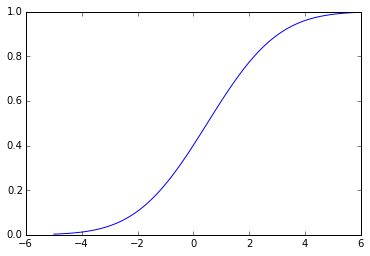

In [11]:
plt.plot(x, X.cdf(x))

In [13]:
import orthpol

In [14]:
p = orthpol.OrthogonalPolynomial(5, X)

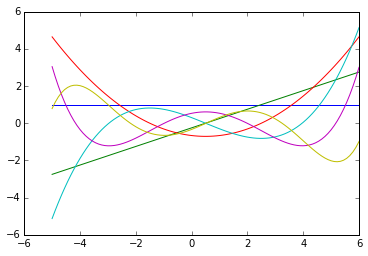

In [16]:
plt.plot(x, p(x))

In [19]:
p = orthpol.OrthogonalPolynomial(5, wf=lambda x: np.exp(-x), left=0, right=np.inf)

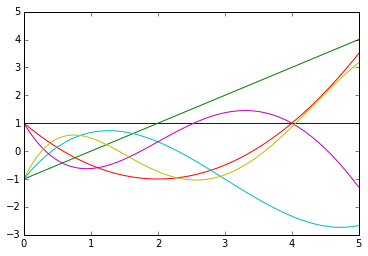

In [20]:
x = np.linspace(0., 5, 100)
plt.plot(x, p(x))

In [23]:
p.degree

5

In [24]:
print str(p)

Orthogonal Polynomial
 alpha: [  1.           3.00000007   5.00000015   6.99995695   9.00046613
  10.99548494]
 beta: [ 1.          1.          2.00000027  2.99999336  4.00003631  4.99976471]
 gamma: [ 1.          1.          2.00000027  2.99999336  4.00003631  4.99976471]
 normalized: True


In [32]:
import design
X, w = design.sparse_grid(2, 5, rule='CC')
X
w

array([-0.92906004, -0.10196179, -0.10196179, -0.10196179, -0.10196179,
       -0.31949678, -0.31949678, -0.01029567, -0.01029567, -0.01029567,
       -0.01029567, -0.31949678, -0.31949678, -0.05311615, -0.13248649,
       -0.13248649, -0.05311615, -0.05526848, -0.05526848, -0.05526848,
       -0.05526848, -0.05526848, -0.05526848, -0.05526848, -0.05526848,
       -0.05311615, -0.13248649, -0.13248649, -0.05311615,  0.01355602,
        0.03650633,  0.05448786,  0.06424208,  0.06424208,  0.05448786,
        0.03650633,  0.01355602, -0.01383086, -0.03596683, -0.03596683,
       -0.01383086, -0.01383086, -0.03596683, -0.03596683, -0.01383086,
        0.01354497,  0.01354497,  0.01354497,  0.01354497, -0.01383086,
       -0.01383086, -0.03596683, -0.03596683, -0.03596683, -0.03596683,
       -0.01383086, -0.01383086,  0.01355602,  0.03650633,  0.05448786,
        0.06424208,  0.06424208,  0.05448786,  0.03650633,  0.01355602,
        0.0187864 ,  0.05691583,  0.09252553,  0.12454422,  0.15

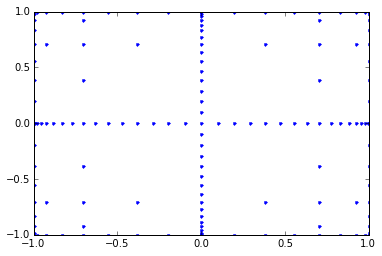

In [33]:
plt.plot(X[:, 0], X[:, 1], '.')